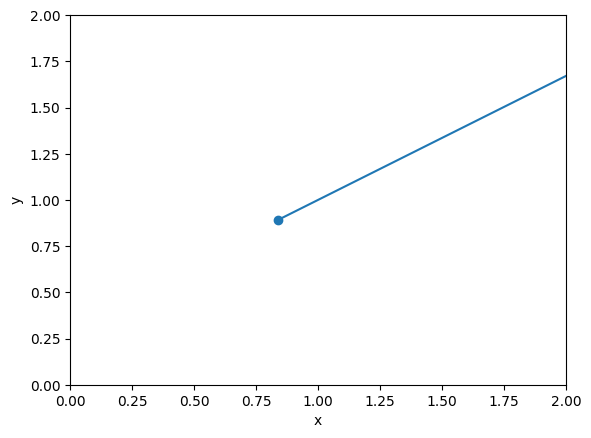

In [11]:
%matplotlib inline
from IPython.display import HTML
from matplotlib import rc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the Poisson potential
def U(x):
    return 1 / np.linalg.norm(x - np.array([1, 1]))

# Compute the gradient of U manually
def gradient_U(x):
    delta_x = x[0] - 1
    delta_y = x[1] - 1
    denominator = (delta_x ** 2 + delta_y ** 2) ** (3/2)
    partial_x = delta_x / denominator
    partial_y = delta_y / denominator
    return np.array([partial_x, partial_y])

def poisson_flow(x, U):
    """Computes the Poisson flow of a particle at position x with potential U."""
    return x - gradient_U(x)

def simulate_poisson_flow(x0, U, t_max):
    """Simulates the Poisson flow of a particle at position x0 with potential U for time t_max."""
    trajectory = [x0]
    x = x0
    for t in range(1, t_max + 1):
        x = poisson_flow(x, U)
        trajectory.append(x)
    return np.array(trajectory)

def animate_poisson_flow(x0, U, t_max, interval=100):
    """Animates the Poisson flow of a particle at position x0 with potential U for time t_max with interval."""
    trajectory = simulate_poisson_flow(x0, U, t_max)
    
    fig, ax = plt.subplots()
    line, = ax.plot([], [], 'o-')
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        line.set_data(trajectory[:frame, 0], trajectory[:frame, 1])
        return line,

    anim = FuncAnimation(fig, update, frames=t_max, init_func=init, interval=interval, blit=True)
    
    rc('animation', html='jshtml')
    return HTML(anim.to_jshtml())

# Sample a random starting position
x0 = np.random.rand(2)

# Run the animation with the corrected gradient
animate_poisson_flow(x0, U, 100)